# Proyek Analisis data : E-commerce-public-dataset

NAMA : Ahmad Fajar Rizky Firdaus

Email : ahmadfajarrizkyfirdaus@gmail.com

id Dicoding :

# Pertanyaan Bisnis



1.   **Pola type pembayaran, harga, freight_value,customer_state, dan seller_state terhadap transaksi yang canceled nya suatu product**

    **pertanyaan ini bertujuan untuk** mengetahui seberapa besar variabel tersebut terhadapat batalnya suatu transaksi. dengan menganalisis hal ini diharapkan dapat meminimalisir terjadinya pembatalan transaksi.

2.  **Apa faktor yang membuat suatu produk menjadi sangat laris**

    **pertanyaan ini bertujuan untuk** mengetahui faktor apa saja yang membuat suatu product laris terjual. dengan menganalisis hal ini diharapkan dapat diterapkan pada produk yang kurang laris.



# LIBRARY

In [2]:
pip install kmodes

In [3]:
import pandas as pd
from kmodes.kmodes import KModes
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import statsmodels.api as sm

pd.set_option('display.max_columns', None)
#untuk menampilkan seluruh kolom (tanpa terpotong)

#  **DATA WARLING**

 GATHERING DATA

import data via GDrive

mendefinisikan nama dataset agar lebih pendek

In [4]:
customers_dataset = pd.read_csv("/content/drive/MyDrive/datadicoding/customers_dataset.csv")
customer = customers_dataset
customer.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [5]:
geolocation_dataset = pd.read_csv("/content/drive/MyDrive/datadicoding/geolocation_dataset.csv")
location = geolocation_dataset
location.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [6]:
order_items_dataset = pd.read_csv("/content/drive/MyDrive/datadicoding/order_items_dataset.csv")
order_items = order_items_dataset
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [7]:
order_payments_dataset = pd.read_csv("/content/drive/MyDrive/datadicoding/order_payments_dataset.csv")
order_payments = order_payments_dataset
order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [8]:
order_reviews_dataset = pd.read_csv("/content/drive/MyDrive/datadicoding/order_reviews_dataset.csv")
order_reviews =order_reviews_dataset
order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [9]:
orders_dataset = pd.read_csv("/content/drive/MyDrive/datadicoding/orders_dataset.csv")
orders = orders_dataset
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [10]:
product_category_name_translation = pd.read_csv("/content/drive/MyDrive/datadicoding/product_category_name_translation.csv")
product_category =product_category_name_translation
product_category.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [11]:
products_dataset = pd.read_csv("/content/drive/MyDrive/datadicoding/products_dataset.csv")
products = products_dataset
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [12]:
sellers_dataset = pd.read_csv("/content/drive/MyDrive/datadicoding/sellers_dataset.csv")
sellers =sellers_dataset
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


 ASSESSING DATA

**DATASET CUSTOMER**

melakukan pengecekan keseusain type data,missing value,duplicate data,describe

In [13]:
customer.info()
customer.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [14]:
print("Jumlah duplikasi pada data customer: ", customer.duplicated().sum())
customer.describe()

Jumlah duplikasi pada data customer:  0


,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


**geolocation_dataset**

melakukan pengecekan keseusain type data,missing value,duplicate data,describe

In [15]:
location.info()
location.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [16]:
print("Jumlah duplikasi pada data location: ", location.duplicated().sum())
location.describe()
#data ini memiliki duplicate

Jumlah duplikasi pada data location:  261831


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


**DATASET ORDER ITEMS**

melakukan pengecekan keseusain type data,missing value,duplicate data,describe

In [17]:
order_items.info()
order_items.isna().sum()
#terdapat type data yang salah pada dataset ini yaitu pada colom shipping_limit_date  yang seharusnya datetime terapi typedata nya object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [18]:
print("Jumlah duplikasi pada data order_items: ", order_items.duplicated().sum())
order_items.describe()

Jumlah duplikasi pada data order_items:  0


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


**DATASET ORDER PAYMENT**

melakukan pengecekan keseusain type data,missing value,duplicate data,describe

In [19]:
order_payments.info()
order_payments.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [20]:
print("Jumlah duplikasi pada data order_payments: ", order_payments.duplicated().sum())
order_payments.describe()

Jumlah duplikasi pada data order_payments:  0


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [21]:
unique_order_payments = order_payments['payment_type'].value_counts()

# Menampilkan hasil
print(unique_order_payments)

credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: payment_type, dtype: int64


**DATASET ORDER REVIEWS**

melakukan pengecekan keseusain type data,missing value,duplicate data,describe

In [22]:
order_reviews.info()
order_reviews.isna().sum()
#pada dataset ini memiliki type data yang tidak sesuai pada colom review_creation_date dan review_answer_timestamp yang seharusnya datetime
#terdapat nilai nan pada colom review_comment_title sebanyak 87656 dan review_comment_message sebanyak 58247

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [23]:
order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [24]:
print("Jumlah duplikasi pada data order_reviews: ", order_reviews.duplicated().sum())
order_reviews.describe()

Jumlah duplikasi pada data order_reviews:  0


,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


**DATASET OREDER**

melakukan pengecekan keseusain type data,missing value,duplicate data,describe

In [25]:
orders.info()
orders.isna().sum()
#dataset ini memiliki colom dengan type data yang tidak sesuai yaitu colom order_purchase_timestamp,
#order_approved_at,	order_delivered_carrier_date,	order_delivered_customer_date, dan	order_estimated_delivery_date

#terdapat missing value di 3 colom

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [26]:
print("Jumlah duplikasi pada data orders: ", orders.duplicated().sum())
orders.describe()

Jumlah duplikasi pada data orders:  0


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [27]:
# Menghitung jumlah kata unik dalam kolom 'order_status' dan menampilkan nilai unik beserta jumlahnya
unique_order_status = orders['order_status'].value_counts()

# Menampilkan hasil
print(unique_order_status)

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64


**DATASET PRODUCT CATEGORY**

melakukan pengecekan keseusain type data,missing value,duplicate data,describe

In [28]:
product_category.info()
product_category.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


product_category_name            0
product_category_name_english    0
dtype: int64

In [29]:
print("Jumlah duplikasi pada data product_category: ", product_category.duplicated().sum())
product_category.describe()

Jumlah duplikasi pada data product_category:  0


,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


**DATASET PRODUCT**

melakukan pengecekan keseusain type data,missing value,duplicate data,describe

In [30]:
products.info()
products.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [31]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [32]:
print("Jumlah duplikasi pada data products: ", products.duplicated().sum())
products.describe()
#nama_produk_panjang, produk_deskripsi_panjang, produk_foto_jumlah, _produk_berat_g,  produk_panjang_cm, produk_tinggi_cm, produk_lebar_cm

Jumlah duplikasi pada data products:  0


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


**DATASET SELLERS**

melakukan pengecekan keseusain type data,missing value,duplicate data,describe

In [33]:
sellers.info()
sellers.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [34]:
print("Jumlah duplikasi pada data sellers: ", sellers.duplicated().sum())
sellers.describe()

Jumlah duplikasi pada data sellers:  0


,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


CLEAN DATA

tahap pemberishan dan penyesuaian data.
hal yang akan dilakukan untuk menangani hal berikut :

1.   dataset **location** memiliki data duplicate
2.   dataset **order_items** terdapat type data yang salah
3.  dataset **order_reviews** memiliki type data yang tidak sesuai dan terdapat nilai nan
4. dataset **orders** memiliki type data yang tidak sesuai , terdapat nilai nan dan menggabung kata uniq "delivered" dan "shipped" menjadi satu kata uniq karena sama
5.  menghapus dan menggunakan colom yang hanya digunakan



In [35]:
#1
# Filter duplicated data
location_duplicated = location[location.duplicated()]

# Print duplicated data
location_duplicated.head(9)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
15,1046,-23.546081,-46.644820,sao paulo,SP
44,1046,-23.546081,-46.644820,sao paulo,SP
65,1046,-23.546081,-46.644820,sao paulo,SP
66,1009,-23.546935,-46.636588,sao paulo,SP
67,1046,-23.546081,-46.644820,sao paulo,SP
72,1046,-23.545320,-46.644069,sao paulo,SP
79,1050,-23.549854,-46.643139,sao paulo,SP
80,1032,-23.540775,-46.635515,sao paulo,SP
82,1046,-23.546081,-46.644820,sao paulo,SP


In [36]:
location.shape

(1000163, 5)

In [37]:
location.describe(include="all")

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
count,1.000163e+06,1.000163e+06,1.000163e+06,1000163,1000163
unique,NaN,NaN,NaN,8011,27
top,NaN,NaN,NaN,sao paulo,SP
freq,NaN,NaN,NaN,135800,404268
mean,3.657417e+04,-2.117615e+01,-4.639054e+01,NaN,NaN
std,3.054934e+04,5.715866e+00,4.269748e+00,NaN,NaN
min,1.001000e+03,-3.660537e+01,-1.014668e+02,NaN,NaN
25%,1.107500e+04,-2.360355e+01,-4.857317e+01,NaN,NaN
50%,2.653000e+04,-2.291938e+01,-4.663788e+01,NaN,NaN
75%,6.350400e+04,-1.997962e+01,-4.376771e+01,NaN,NaN


In [38]:
location_duplicated.shape

(261831, 5)

In [39]:
#2
datetime_columns = ["shipping_limit_date"]

for column in datetime_columns:
  order_items[column] = pd.to_datetime(order_items[column])

In [40]:
order_items.info()
#sekarang type data sudah sesuai untuk colom shipping_limit_date pada dataset order_items

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [41]:
#3
datetime_columns = ["review_creation_date","review_answer_timestamp"]

for column in datetime_columns:
  order_reviews[column] = pd.to_datetime(order_reviews[column])

In [42]:
order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


In [43]:
order_reviews.head(10)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,NaN,NaN,2018-04-13,2018-04-16 00:39:37
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,NaN,NaN,2017-07-16,2017-07-18 19:30:34
7,7c6400515c67679fbee952a7525281ef,c31a859e34e3adac22f376954e19b39d,5,NaN,NaN,2018-08-14,2018-08-14 21:36:06
8,a3f6f7f6f433de0aefbb97da197c554c,9c214ac970e84273583ab523dfafd09b,5,NaN,NaN,2017-05-17,2017-05-18 12:05:37
9,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,recomendo,aparelho eficiente. no site a marca do aparelh...,2018-05-22,2018-05-23 16:45:47


In [44]:
order_reviews.shape

(99224, 7)

In [45]:
order_reviews_new = order_reviews.drop(['review_comment_title'], axis=1)
#mengapus colom review_comment_title dengan menbuat dataset baru yiatu order_reviews_new
order_reviews_new.head()

,review_id,order_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,2018-02-17,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53


In [46]:
order_reviews_new.shape

(99224, 6)

In [47]:
#4
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [48]:
datetime_columns = ["order_purchase_timestamp","order_approved_at","order_delivered_carrier_date","order_delivered_customer_date","order_estimated_delivery_date"]

for column in datetime_columns:
  orders[column] = pd.to_datetime(orders[column])

In [49]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [50]:
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [51]:
orders_new = orders.drop(['order_delivered_customer_date', 'order_delivered_carrier_date'], axis=1)
#mengapus colom review_comment_title dan review_comment_message dengan menbuat dataset baru yiatu order_reviews_new

In [52]:
orders_new.isna().sum()

order_id                           0
customer_id                        0
order_status                       0
order_purchase_timestamp           0
order_approved_at                160
order_estimated_delivery_date      0
dtype: int64

In [53]:
# Menggantikan nilai 'shipped' dengan 'delivered' dalam kolom 'order_status'
orders_new['order_status'] = orders_new['order_status'].replace({'shipped': 'delivered'})
# Sekarang, 'shipped' dianggap sebagai 'delivered' dalam dataset

In [54]:
# Menghitung jumlah kata unik dalam kolom 'order_status' dan menampilkan nilai unik beserta jumlahnya yang terbaru
new_unique_order_status = orders_new['order_status'].value_counts()

# Menampilkan hasil
print(new_unique_order_status)

delivered      97585
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64


In [55]:
# memasitikan kata uniq "shipped" sudah tidak ada
ship_orders = orders_new[orders_new['order_status'] == 'shipped']

# Menampilkan hasil filter
ship_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_estimated_delivery_date


In [56]:
#5
products_new = products.drop(["product_name_lenght",	"product_description_lenght",		"product_weight_g",	"product_length_cm",	"product_height_cm",	"product_width_cm"], axis=1)
products_new.head()

,product_id,product_category_name,product_photos_qty
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,1.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,1.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,1.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,1.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,4.0


untuk data dengan penanganan drop colums dan drop duplicate akan dijaikan data baru(mendefinisikan nya dengan "new") setelah perubahan tanpa menghilangkan data awal

In [57]:
# Kelompokkan data berdasarkan 'seller_id' dan temukan harga maksimum di setiap kelompok
max_prices = order_items.groupby('seller_id')['price'].max().reset_index()

# Urutkan hasil secara descending berdasarkan harga maksimum
top_sellers = max_prices.sort_values(by='price', ascending=False)

# Ambil lima 'seller_id' teratas
top_5_sellers = top_sellers.head(5)

print(top_5_sellers)

                             seller_id   price
2736  e3b4998c7a498169dc7bce44e6bb6277  6735.0
1583  80ceebb4ee9b31afb6c6a916a574a1e2  6729.0
2881  ee27a8f15b1dded4d213a468ba4eb391  6499.0
1086  59417c56835dd8e2e72f91f809cd4092  4799.0
2408  c72de06d72748d1a0dfb2125be43ba63  4590.0


In [58]:
# Menghitung jumlah kata unik dalam kolom 'seller_city'
total_unique_cities = sellers['seller_city'].nunique()

print(f"Total unique cities: {total_unique_cities}")

Total unique cities: 611


In [59]:
order_reviews_new = order_reviews.drop(['review_comment_title'], axis=1)
#mengapus colom review_comment_title dengan menbuat dataset baru yiatu order_reviews_new
order_reviews_new.head()

,review_id,order_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,2018-02-17,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53


GABUNG DATA

pada bagian ini dilakukan penggabungan semua data terbaru, untuk mengexplore data lebih lanjut

NOTE:**data location tidak di gambungkan kedalam all data karena apa yang yang dipelukan ada di dataset location sudah ada di dataset lain nya.**

In [60]:
order1 = pd.merge(orders_new, order_items, on='order_id')
add_payment = pd.merge(order1, order_payments, on='order_id')
data_order = pd.merge(add_payment, order_reviews_new, on='order_id')
add_customer = pd.merge(customer, data_order, on='customer_id')
data_PreFull = pd.merge(add_customer, sellers, on='seller_id')
add_product = pd.merge(products_new, data_PreFull, on='product_id')
data_PreFull_addProCe = pd.merge(product_category, add_product, on='product_category_name')
all_data = data_PreFull_addProCe

In [61]:
summary_stats = all_data.describe(include='all')

<ipython-input-61-87270bb43cdf>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  summary_stats = all_data.describe(include='all')
<ipython-input-61-87270bb43cdf>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  summary_stats = all_data.describe(include='all')
<ipython-input-61-87270bb43cdf>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  summary_stats = all_data.describe(include='all')
<

In [62]:
summary_stats

,product_category_name,product_category_name_english,product_id,product_photos_qty,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_estimated_delivery_date,order_item_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp,seller_zip_code_prefix,seller_city,seller_state
count,115609,115609,115609,115609.000000,115609,115609,115609.000000,115609,115609,115609,115609,115609,115595,115609,115609.000000,115609,115609,115609.000000,115609.000000,115609.000000,115609,115609.000000,115609.000000,115609,115609.000000,48906,115609,115609,115609.000000,115609,115609
unique,71,71,32171,NaN,96516,93396,NaN,4093,27,96516,6,95989,88332,449,NaN,3028,91386,NaN,NaN,NaN,4,NaN,NaN,96319,NaN,35176,632,96163,NaN,604,23
top,cama_mesa_banho,bed_bath_table,aca2eb7d00ea1a7b8ebd4e68314663af,NaN,270c23a11d024a44c896d1894b261a83,9a736b248f67d166d2fbb006bcb877c3,NaN,sao paulo,SP,895ab968e7bb0d5659d16cd74cd1650c,delivered,2017-08-08 20:26:31,2017-08-08 20:43:31,2017-12-20 00:00:00,NaN,4a3ca9315b744ce9f8e9374361493884,2017-08-14 20:43:31,NaN,NaN,NaN,credit_card,NaN,NaN,eef5dbca8d37dfce6db7d7b16dd0525e,NaN,Muito bom,2017-12-19 00:00:00,2017-08-17 22:17:55,NaN,sao paulo,SP
freq,11847,11847,533,NaN,63,75,NaN,18267,48797,63,114348,63,63,649,NaN,2128,63,NaN,NaN,NaN,85278,NaN,NaN,63,NaN,253,531,63,NaN,28811,82417
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-09-04 21:15:19,2016-10-04 09:43:32,2016-10-20 00:00:00,NaN,NaN,2016-09-19 00:15:34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-10-15 00:00:00,2016-10-16 03:20:17,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-09-03 09:06:57,2018-09-03 17:40:06,2018-10-25 00:00:00,NaN,NaN,2020-04-09 22:35:08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-08-31 00:00:00,2018-10-29 12:27:35,NaN,NaN,NaN
mean,NaN,NaN,NaN,2.205373,NaN,NaN,35061.537597,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.194535,NaN,NaN,120.619850,20.056880,1.093747,NaN,2.946233,172.387379,NaN,4.034409,NaN,NaN,NaN,24515.713958,NaN,NaN
std,NaN,NaN,NaN,1.717771,NaN,NaN,29841.671732,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.685926,NaN,NaN,182.653476,15.836184,0.729849,NaN,2.781087,265.873969,NaN,1.385584,NaN,NaN,NaN,27636.640968,NaN,NaN
min,NaN,NaN,NaN,1.000000,NaN,NaN,1003.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.850000,0.000000,1.000000,NaN,0.000000,0.000000,NaN,1.000000,NaN,NaN,NaN,1001.000000,NaN,NaN
25%,NaN,NaN,NaN,1.000000,NaN,NaN,11310.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,39.900000,13.080000,1.000000,NaN,1.000000,60.870000,NaN,4.000000,NaN,NaN,NaN,6429.000000,NaN,NaN


# EDA 1
1.   **Pola type pembayaran, harga, freight_value,customer_state, dan seller_state terhadap transaksi yang canceled nya suatu product**

    **pertanyaan ini bertujuan untuk** mengetahui seberapa besar variabel tersebut terhadapat batalnya suatu transaksi. dengan menganalisis hal ini diharapkan dapat meminimalisir terjadinya pembatalan transaksi.

In [63]:
# Menghitung jumlah nilai unik dalam kolom 'customer_state'
total_unique_states = customer['customer_state'].nunique()

print(f"Total unique states: {total_unique_states}")

Total unique states: 27


In [64]:
# Menghitung frekuensi setiap customer_city
state_counts = customer['customer_state'].value_counts()

# Mengambil 10 customer_city teratas
Top_state = state_counts.head(5)

# Membuat DataFrame baru untuk data yang akan digunakan dalam plotly
top_state_df = pd.DataFrame({'Customer State': Top_state.index, 'Number of Customers': Top_state.values})

# Membuat plotly bar chart interaktif
fig = px.bar(top_state_df, x='Customer State', y='Number of Customers', color='Customer State',
             color_discrete_map={'Customer State': 'skyblue'})
fig.update_layout(title='Top 5 Customer State', xaxis_title='Customer State', yaxis_title='Number of Customers')
fig.update_xaxes(tickangle=45)
fig.show()

menambahkan kolom baru yaitu colom percentage_freight_to_price, agar mengetahui besaran biaya pengiriman dengan membandingkannya dengan harga barang

In [65]:
# Menghitung persentase biaya pengiriman terhadap harga
all_data['percentage_freight_to_price'] = (all_data['freight_value'] / all_data['price']) * 100

# Hitung selisih hari dan tambahkan ke dalam kolom baru 'selisih_hari'
all_data['selisih_hari'] = (all_data['order_estimated_delivery_date'] - all_data['order_approved_at']).dt.days

# Menampilkan data
all_data.head()

,product_category_name,product_category_name_english,product_id,product_photos_qty,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_estimated_delivery_date,order_item_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp,seller_zip_code_prefix,seller_city,seller_state,percentage_freight_to_price,selisih_hari
0,beleza_saude,health_beauty,e3e020af31d4d89d2602272b315c3f6e,3.0,9c2f403519bcb363683a7179f0f94bd4,dc83fe8f72fb4388f079a2f9b586240c,8599,itaquaquecetuba,SP,a41753c6a1d8accb89732e36243432d7,delivered,2017-05-12 10:51:43,2017-05-12 11:05:13,2017-06-05,1,94144541854e298c2d976cb893b81343,2017-05-18 11:05:13,29.9,15.79,1,credit_card,3,45.69,e40a00338817a7127bfbf45220c30e8c,4,NaN,2017-05-20,2017-05-21 11:38:19,94451,viamao,RS,52.809365,23.0
1,beleza_saude,health_beauty,c5d8079278e912d7e3b6beb48ecb56e8,1.0,397cbe809e45d41179dcdd64966e4747,ba0a84d4272f023846c748fd2eb76ffd,20261,rio de janeiro,RJ,6a1594b5f5cfc5bac6dcdc3f48f22b5e,delivered,2018-03-06 18:14:49,2018-03-06 18:30:16,2018-04-12,1,abcd2cb37d46c2c8fb1bf071c859fc5b,2018-03-12 18:30:16,95.9,27.22,1,credit_card,6,123.12,77bb6629f429afe0121776a1bba4f65f,5,NaN,2018-03-15,2018-03-16 03:26:29,78020,cuiaba,MT,28.383733,36.0
2,beleza_saude,health_beauty,c5d8079278e912d7e3b6beb48ecb56e8,1.0,1d7d832199ca5ea415e212d226ae106c,46e277a4bd2d4bf3e0e8cfaf4ea3c41b,39401,montes claros,MG,f6fbf7907913892ffc12ada3bff286ba,delivered,2017-07-31 18:47:11,2017-07-31 19:03:15,2017-08-30,1,abcd2cb37d46c2c8fb1bf071c859fc5b,2017-08-04 19:03:15,89.9,38.18,1,credit_card,4,128.08,f3d50350bb91071856a1aa302d58c32d,4,NaN,2017-08-11,2017-08-15 11:41:14,78020,cuiaba,MT,42.469410,29.0
3,beleza_saude,health_beauty,36555a2f528d7b2a255c504191445d39,1.0,af4cda2d3ad3e63a2e7eb0d75379f1d8,8ad15fb1cf056731335e36eb723c0eac,98780,santa rosa,RS,a63144d37a00c28ef382668a5d5ece8b,delivered,2018-02-08 13:55:48,2018-02-08 14:40:26,2018-03-16,1,851773c885feb5e2da3b4f82bc2b17ce,2018-02-14 14:31:45,29.9,16.11,1,credit_card,2,46.01,b5425a02e3804ec8cb2ef00f95cc501c,5,NaN,2018-02-22,2018-04-28 21:25:23,18683,lencois paulista,SP,53.879599,35.0
4,beleza_saude,health_beauty,e586ebb6022265ae1eea38f46ffe3ead,3.0,f05b7d5565860304973f163aba0b8804,f77ac730b6784c05fb61e42cac98d9c1,88740,armazem,SC,93d7cfb112111edec49fd02555f48da3,delivered,2018-08-15 17:00:58,2018-08-16 03:15:16,2018-08-29,1,01fdefa7697d26ad920e9e0346d4bd1b,2018-08-20 03:15:16,64.9,19.64,1,boleto,1,84.54,aaa484cf3320427beccf4a6d277cf7f3,3,NaN,2018-08-24,2018-08-25 17:18:34,86050,londrina,PR,30.261941,12.0


In [66]:
# Filter data dengan kondisi order_status = 'canceled' dan selisih_hari lebih dari 1
canceled_orders = all_data[(all_data['order_status'] == 'canceled') & (all_data['selisih_hari'] > 1)]

# Pilih hanya kolom tertentu untuk berfokus dengan pertanyaan bisnis no 2
selected_columns = ['customer_city','product_category_name', 'payment_type', 'price','freight_value','order_status','percentage_freight_to_price','selisih_hari' ]
filtered_columns_canceled = canceled_orders[selected_columns]

# Tampilkan hasil filter
filtered_columns_canceled

,customer_city,product_category_name,payment_type,price,freight_value,order_status,percentage_freight_to_price,selisih_hari
132,sao paulo,beleza_saude,credit_card,47.49,7.59,canceled,15.982312,3.0
203,sao paulo,beleza_saude,voucher,40.50,13.08,canceled,32.296296,17.0
204,sao paulo,beleza_saude,credit_card,40.50,13.08,canceled,32.296296,17.0
1311,sao paulo,beleza_saude,credit_card,49.90,15.10,canceled,30.260521,23.0
1411,sao paulo,beleza_saude,credit_card,277.72,12.57,canceled,4.526141,10.0
...,...,...,...,...,...,...,...,...
115067,franca,bebidas,credit_card,49.99,19.21,canceled,38.427686,20.0
115493,itu,dvds_blu_ray,credit_card,19.90,25.63,canceled,128.793970,24.0
115494,itu,dvds_blu_ray,voucher,19.90,25.63,canceled,128.793970,24.0
115498,sao vicente,dvds_blu_ray,credit_card,1420.00,18.23,canceled,1.283803,15.0


tujuan pembuatan colom baru dengan isi adalah besaran nilai freight_value terhadapat nilai price dalam bentuk prsentase, bertujuan untuk meihat apakah jika presentase di range tertentu akan mempengaruhi pembatalan order dan apa penyebab yang menjadikan freight_value sangat tinggi.

tujuan pembuatan colom baru selisih dengan isi adalahuntuk mengetahui jarak hari antara pembelian disetujui dengan waktu pengiriman,dengan tujuan apakah selisih waktu yang lama menyebabkan pembatalan order


In [67]:
# Filter data dengan kondisi order_status = 'canceled'
canceled_orders = all_data[all_data['order_status'] == 'canceled']

# Hitung jumlah unik produk yang memiliki order_status 'delivered'
top_products_canceled =canceled_orders['product_category_name_english'].value_counts().head(5)

# Tampilkan hasil
print("Top 5 Produk Teratas dengan Order Status 'canceled':")
print(top_products_canceled)

Top 5 Produk Teratas dengan Order Status 'canceled':
housewares               57
sports_leisure           51
computers_accessories    44
health_beauty            40
furniture_decor          37
Name: product_category_name_english, dtype: int64


In [68]:
# Filter data dengan kondisi order_status = 'canceled'
canceled_orders = all_data[all_data['order_status'] == 'canceled']

# Hitung frekuensi munculnya setiap jenis pembayaran
canceled_payment_type_counts = canceled_orders['payment_type'].value_counts()

# Tampilkan hasil
print("Frekuensi Jenis Pembayaran dengan Order Status 'Canceled':")
print(canceled_payment_type_counts)

Frekuensi Jenis Pembayaran dengan Order Status 'Canceled':
credit_card    411
boleto          92
voucher         27
debit_card       6
Name: payment_type, dtype: int64


In [69]:
# Setel ulang indeks dan ganti nama kolom
canceled_payment_type_counts = canceled_payment_type_counts.reset_index()
canceled_payment_type_counts.columns = ['payment_type', 'count']

# bar chart
fig = px.bar(canceled_payment_type_counts, x='payment_type', y='count',
             labels={'payment_type': 'Jenis Pembayaran', 'count': 'Jumlah Pembatalan'},
             title='Frekuensi Jenis Pembayaran dengan Order Status "Canceled"')
fig.show()

product dengan category housewares,sports_leisure dan computers_accessories menjadi category dengan status order pembatalan top 3

type payment dengan status order yang dibatalkan terbanyak terdapat pada status order = credit card

In [70]:
# Filter data dengan kondisi order_status = 'canceled'
canceled_credit_card_orders = all_data[(all_data['order_status'] == 'canceled') & (all_data['payment_type'] == 'credit_card')]

# Pilih hanya kolom tertentu untuk berfokus dengan pertanyaan bisnis no 2
selected_columns = ['customer_city', 'product_category_name', 'payment_type', 'price', 'freight_value', 'order_status', 'percentage_freight_to_price']
credit_card_canceled = canceled_credit_card_orders[selected_columns]

# Tambahkan kondisi berdasarkan rentang persentase biaya pengiriman terhadap harga
bins = [0, 15, 30, 50, 70, 90, 100, float('inf')]
labels = ['0%-15%', '16%-30%', '31%-50%', '51%-70%','71%-90%','91%-100%', '100%+']
credit_card_canceled['percentage_range'] = pd.cut(credit_card_canceled['percentage_freight_to_price'], bins=bins, labels=labels)

# Hitung total jumlah pesanan dalam setiap rentang persentase
total_orders_by_percentage_range = credit_card_canceled.groupby('percentage_range')['order_status'].count()

# Tampilkan hasil
total_orders_by_percentage_range


<ipython-input-70-83b36e5e5b44>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



percentage_range
0%-15%      163
16%-30%     117
31%-50%      67
51%-70%      32
71%-90%      19
91%-100%      1
100%+        12
Name: order_status, dtype: int64

In [71]:
# Hitung total jumlah pesanan dalam setiap rentang persentase
total_orders_by_percentage_range = credit_card_canceled.groupby('percentage_range')['order_status'].count().reset_index()

# Buat grafik dengan Plotly
fig = px.bar(total_orders_by_percentage_range, x='percentage_range', y='order_status',
             labels={'percentage_range': 'Rentang Persentase Biaya Pengiriman', 'order_status': 'Jumlah Pesanan'},
             title='Total Jumlah Pesanan dalam Setiap Rentang Persentase Biaya Pengiriman')

fig.update_xaxes(title_text='Rentang Persentase Biaya Pengiriman')  # Menambahkan label sumbu x
fig.update_yaxes(title_text='Jumlah Pesanan')  # Menambahkan label sumbu y

fig.show()

pembelian dengan pembayaran **cradit card** dengan biaya pengiriman **range 0 sampa 15%** menjadi orderan yang **paling banyak dibatalkan**
padahal sudah paling murah tapi kenapa menjadi paling banyak terjadinya pembatalan, apakah mungkin karena customer merasa barang ini dikirim dari seller yang satu state tapi kenapa ada "percentage_freight_to_price"

In [72]:
# Buat rentang persentase biaya pengiriman terhadap harga
bins = [0, 15, float('inf')]
labels = ['0-15%', '15%+']
all_data['percentage_freight_to_price_range'] = pd.cut(all_data['percentage_freight_to_price'], bins=bins, labels=labels)

# Filter data dengan kondisi order_status = 'canceled', payment_type = 'credit_card', dan rentang persentase 0-15%
filtered_data_R015 = all_data[(all_data['order_status'] == 'canceled') & (all_data['payment_type'] == 'credit_card') & (all_data['percentage_freight_to_price_range'] == '0-15%')]

# Pilih hanya kolom tertentu untuk berfokus dengan pertanyaan bisnis
selected_columns = ['customer_state', 'seller_state', 'percentage_freight_to_price', 'payment_type', 'order_status','payment_installments']
filtered_data = filtered_data_R015[selected_columns]

# Tampilkan hasil filter
filtered_data

,customer_state,seller_state,percentage_freight_to_price,payment_type,order_status,payment_installments
1411,SP,SP,4.526141,credit_card,canceled,4
1973,SC,SP,13.147505,credit_card,canceled,7
2359,SP,SP,14.412713,credit_card,canceled,3
2713,RJ,RJ,13.806344,credit_card,canceled,2
3817,SP,SP,9.306533,credit_card,canceled,2
...,...,...,...,...,...,...
113526,MG,SP,9.060309,credit_card,canceled,10
113527,MG,SP,9.060309,credit_card,canceled,10
113528,MG,SP,9.060309,credit_card,canceled,10
114522,PR,SP,2.944681,credit_card,canceled,10


<ipython-input-73-5cb388dbd7c9>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



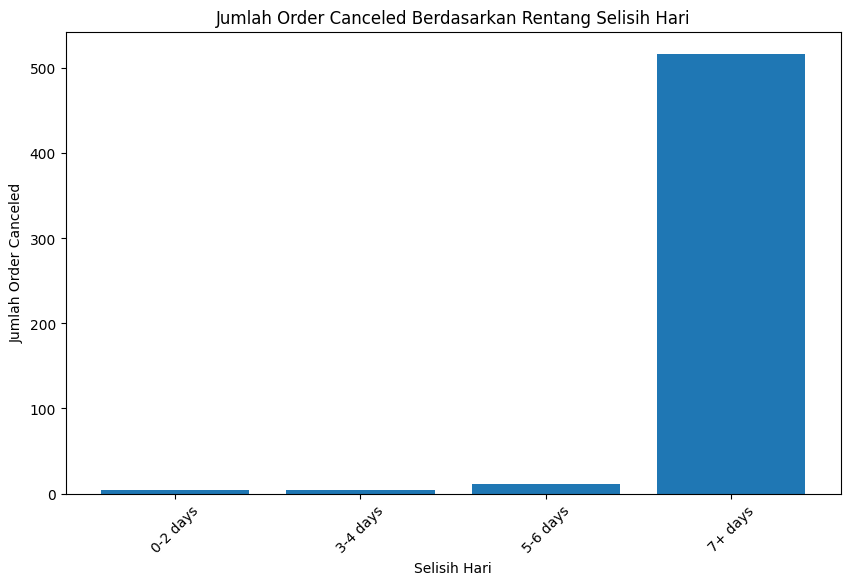

In [73]:
# Buat rentang selisih hari
bins = [0, 2, 4, 6, float('inf')]
labels = ['0-2 days', '3-4 days', '5-6 days', '7+ days']
canceled_orders['selisih_hari_range'] = pd.cut(canceled_orders['selisih_hari'], bins=bins, labels=labels)

# Hitung jumlah order yang dibatalkan dalam setiap rentang selisih hari
canceled_orders_counts = canceled_orders['selisih_hari_range'].value_counts().sort_index()

# Buat grafik batang
plt.figure(figsize=(10, 6))
plt.bar(canceled_orders_counts.index, canceled_orders_counts.values)
plt.xlabel('Selisih Hari')
plt.ylabel('Jumlah Order Canceled')
plt.title('Jumlah Order Canceled Berdasarkan Rentang Selisih Hari')
plt.xticks(rotation=45)
plt.show()

In [74]:
# Filter data dengan kondisi order_status = 'canceled', payment_type = 'credit_card', dan rentang persentase 0-15%
filtered_dataa = all_data[(all_data['order_status'] == 'canceled') & (all_data['payment_type'] == 'credit_card') & (all_data['percentage_freight_to_price_range'] == '0-15%')]

# Kelompokkan data berdasarkan 'customer_state' dan 'seller_state' serta menghitung jumlah pembatalan order dalam setiap kelompok
cancellation_counts = filtered_dataa.groupby(['customer_state', 'seller_state']).size().reset_index(name='total_canceled_orders')

# Urutkan hasil secara descending berdasarkan total_canceled_orders
cancellation_counts_sorted = cancellation_counts.sort_values(by='total_canceled_orders', ascending=False)

# Tampilkan hasil filter
cancellation_counts_sorted.head()

,customer_state,seller_state,total_canceled_orders
29,SP,SP,77
15,RJ,SP,11
9,MG,SP,10
11,PR,PR,7
12,PR,SP,6


melakukan analisis lanjutan dengan CATEGORY CLUSTER

In [75]:
# Menghapus baris dengan nilai NaN dalam kolom 'selisih_hari'
all_data = all_data.dropna(subset=['selisih_hari'])
# Menghapus baris dengan nilai NaN dalam kolom 'order_approved_at'
all_data = all_data.dropna(subset=['order_approved_at'])

In [76]:
all_data.isna().sum()

product_category_name                    0
product_category_name_english            0
product_id                               0
product_photos_qty                       0
customer_id                              0
customer_unique_id                       0
customer_zip_code_prefix                 0
customer_city                            0
customer_state                           0
order_id                                 0
order_status                             0
order_purchase_timestamp                 0
order_approved_at                        0
order_estimated_delivery_date            0
order_item_id                            0
seller_id                                0
shipping_limit_date                      0
price                                    0
freight_value                            0
payment_sequential                       0
payment_type                             0
payment_installments                     0
payment_value                            0
review_id  

In [77]:
data = all_data
# Pilih kolom yang akan digunakan untuk clustering
selected_columns = [ 'customer_state','seller_state', 'payment_type', 'percentage_freight_to_price_range']

# Lakukan one-hot encoding pada kolom-kolom kategori
data_encoded = pd.get_dummies(data[selected_columns])

# Inisialisasi model K-Modes dengan jumlah kluster yang diinginkan
n_clusters = 3
kmode = KModes(n_clusters=n_clusters, init='Huang', n_init=5, verbose=1)

# Melakukan clustering pada data yang telah di-encode
clusters = kmode.fit_predict(data_encoded)

# Menambahkan kolom kluster ke data
data['Cluster'] = clusters


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 66667, cost: 210245.0
Run 1, iteration: 2/100, moves: 386, cost: 210245.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 36051, cost: 225335.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 39437, cost: 218845.0
Run 3, iteration: 2/100, moves: 10087, cost: 218845.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 22862, cost: 230537.0
Run 4, iteration: 2/100, moves: 247, cost: 230537.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 1809, cost: 237249.0
Best run was number 1


In [78]:
# Menampilkan hasil clustering
data

,product_category_name,product_category_name_english,product_id,product_photos_qty,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_estimated_delivery_date,order_item_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp,seller_zip_code_prefix,seller_city,seller_state,percentage_freight_to_price,selisih_hari,percentage_freight_to_price_range,Cluster
0,beleza_saude,health_beauty,e3e020af31d4d89d2602272b315c3f6e,3.0,9c2f403519bcb363683a7179f0f94bd4,dc83fe8f72fb4388f079a2f9b586240c,8599,itaquaquecetuba,SP,a41753c6a1d8accb89732e36243432d7,delivered,2017-05-12 10:51:43,2017-05-12 11:05:13,2017-06-05,1,94144541854e298c2d976cb893b81343,2017-05-18 11:05:13,29.90,15.79,1,credit_card,3,45.69,e40a00338817a7127bfbf45220c30e8c,4,NaN,2017-05-20,2017-05-21 11:38:19,94451,viamao,RS,52.809365,23.0,15%+,2
1,beleza_saude,health_beauty,c5d8079278e912d7e3b6beb48ecb56e8,1.0,397cbe809e45d41179dcdd64966e4747,ba0a84d4272f023846c748fd2eb76ffd,20261,rio de janeiro,RJ,6a1594b5f5cfc5bac6dcdc3f48f22b5e,delivered,2018-03-06 18:14:49,2018-03-06 18:30:16,2018-04-12,1,abcd2cb37d46c2c8fb1bf071c859fc5b,2018-03-12 18:30:16,95.90,27.22,1,credit_card,6,123.12,77bb6629f429afe0121776a1bba4f65f,5,NaN,2018-03-15,2018-03-16 03:26:29,78020,cuiaba,MT,28.383733,36.0,15%+,1
2,beleza_saude,health_beauty,c5d8079278e912d7e3b6beb48ecb56e8,1.0,1d7d832199ca5ea415e212d226ae106c,46e277a4bd2d4bf3e0e8cfaf4ea3c41b,39401,montes claros,MG,f6fbf7907913892ffc12ada3bff286ba,delivered,2017-07-31 18:47:11,2017-07-31 19:03:15,2017-08-30,1,abcd2cb37d46c2c8fb1bf071c859fc5b,2017-08-04 19:03:15,89.90,38.18,1,credit_card,4,128.08,f3d50350bb91071856a1aa302d58c32d,4,NaN,2017-08-11,2017-08-15 11:41:14,78020,cuiaba,MT,42.469410,29.0,15%+,1
3,beleza_saude,health_beauty,36555a2f528d7b2a255c504191445d39,1.0,af4cda2d3ad3e63a2e7eb0d75379f1d8,8ad15fb1cf056731335e36eb723c0eac,98780,santa rosa,RS,a63144d37a00c28ef382668a5d5ece8b,delivered,2018-02-08 13:55:48,2018-02-08 14:40:26,2018-03-16,1,851773c885feb5e2da3b4f82bc2b17ce,2018-02-14 14:31:45,29.90,16.11,1,credit_card,2,46.01,b5425a02e3804ec8cb2ef00f95cc501c,5,NaN,2018-02-22,2018-04-28 21:25:23,18683,lencois paulista,SP,53.879599,35.0,15%+,1
4,beleza_saude,health_beauty,e586ebb6022265ae1eea38f46ffe3ead,3.0,f05b7d5565860304973f163aba0b8804,f77ac730b6784c05fb61e42cac98d9c1,88740,armazem,SC,93d7cfb112111edec49fd02555f48da3,delivered,2018-08-15 17:00:58,2018-08-16 03:15:16,2018-08-29,1,01fdefa7697d26ad920e9e0346d4bd1b,2018-08-20 03:15:16,64.90,19.64,1,boleto,1,84.54,aaa484cf3320427beccf4a6d277cf7f3,3,NaN,2018-08-24,2018-08-25 17:18:34,86050,londrina,PR,30.261941,12.0,15%+,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115604,fashion_roupa_infanto_juvenil,fashion_childrens_clothes,57bdf3098169cccdb62221bd3e089cbd,1.0,7968f8e8d5429c6a0611671f5a52ed2b,cd52ca09554e5cc34d9ec28d230008af,89074,blumenau,SC,bc3ac768a8963f4ca68942ea6558fc9f,delivered,2018-03-21 09:40:36,2018-03-22 03:09:01,2018-04-10,1,d98eec89afa3380e14463da2aabaea72,2018-03-28 03:09:01,39.99,6.43,1,boleto,1,106.43,c4481ef5d41037c21d1b4a14d4eab656,5,NaN,2018-03-28,2018-03-29 11:16:27,90010,porto alegre,RS,16.079020,18.0,15%+,1
115605,fashion_roupa_infanto_juvenil,fashion_childrens_clothes,57bdf3098169cccdb62221bd3e089cbd,1.0,8325d6e7af2f2bfb58cf040729b232dd,a1d53377ab83871b0ad483b03ac69d6c,3570,sao paulo,SP,b99217b1fcf2fdeace7b8d869b76cb91,delivered,2018-03-07 17:42:06,2018-03-07 17:55:36,2018-04-02,1,d98eec89afa3380e14463da2aabaea72,2018-03-13 17:55:36,39.99,10.15,1,credit_card,3,110.44,048757148581cbd2c92bc96ca5d73211,5,NaN,2018-03-16,2018-03-19 09:12:20,90010,porto alegre,RS,25.381345,25.0,15%+,2
115606,fashion_roupa_infanto_juvenil,fashion_child

In [79]:
canceled_data = data[data['order_status'] == 'canceled']
cluster_counts = canceled_data['Cluster'].value_counts()
print(cluster_counts)

0    219
2    166
1    151
Name: Cluster, dtype: int64


In [80]:
# Simpan DataFrame ke dalam file CSV
#data.to_csv('data_gabungan.csv', index=False)

# EDA 2
2.  **Apa faktor yang membuat suatu produk menjadi sangat laris**

    **pertanyaan ini bertujuan untuk** mengetahui faktor apa saja yang membuat suatu product laris terjual. dengan menganalisis hal ini diharapkan dapat diterapkan pada produk yang kurang laris.


diawali dari memfilter dataset untuk mengambil colom yang dibutuhkan.

dengan kondisi dimana order status = delivered

In [81]:
# Filter data dengan kondisi order_status = 'delivered'
delivered_orders = all_data[all_data['order_status'] == 'delivered']

# Pilih hanya kolom tertentu untuk berfokus dengan pertanyaan bisnis no 2
selected_columns = ['product_category_name_english','product_category_name','customer_state','payment_type','percentage_freight_to_price_range', ]
filtered_columns_delivered = delivered_orders[selected_columns]

# Tampilkan hasil filter
filtered_columns_delivered.head()

,product_category_name_english,product_category_name,customer_state,payment_type,percentage_freight_to_price_range
0,health_beauty,beleza_saude,SP,credit_card,15%+
1,health_beauty,beleza_saude,RJ,credit_card,15%+
2,health_beauty,beleza_saude,MG,credit_card,15%+
3,health_beauty,beleza_saude,RS,credit_card,15%+
4,health_beauty,beleza_saude,SC,boleto,15%+


In [82]:
# Filter data dengan kondisi order_status = 'delivered'
delivered_orders = all_data[all_data['order_status'] == 'delivered']

# Hitung jumlah unik produk yang memiliki order_status 'delivered'
top_products_delivered = delivered_orders['product_category_name_english'].value_counts().head(5)

# Tampilkan hasil
print("Top 5 Produk Teratas dengan Order Status 'Delivered':")
print(top_products_delivered)

Top 5 Produk Teratas dengan Order Status 'Delivered':
bed_bath_table           11804
health_beauty             9849
sports_leisure            8833
furniture_decor           8638
computers_accessories     8006
Name: product_category_name_english, dtype: int64


In [83]:
# Hitung jumlah unik produk yang memiliki order_status 'delivered'
top_products_delivered = delivered_orders['product_category_name_english'].value_counts().head(5).reset_index()
top_products_delivered.columns = ['Product', 'Count']

# Buat grafik dengan Plotly
fig = px.bar(top_products_delivered, x='Count', y='Product', orientation='h',
             labels={'Count': 'Jumlah', 'Product': 'Produk'},
             title='Top 5 Produk Teratas dengan Order Status "Delivered"')

# Tampilkan grafik
fig.show()

category bed_bath_table menjadi category paling banyak terjual.



In [84]:
# Filter data dengan kondisi order_status = 'delivered'
delivered_orders = all_data[all_data['order_status'] == 'delivered']

# Hitung frekuensi munculnya setiap jenis pembayaran
delivered_payment_type_counts = delivered_orders['payment_type'].value_counts().reset_index()
delivered_payment_type_counts.columns = ['Payment Type', 'Count']

# Buat grafik dengan Plotly
fig = px.bar(delivered_payment_type_counts, x='Payment Type', y='Count',
             labels={'Count': 'Frekuensi', 'Payment Type': 'Jenis Pembayaran'},
             title='Frekuensi Jenis Pembayaran dengan Order Status "Delivered"')

# Tampilkan grafik
fig.show()

credit card menjadi type pembayaran paling banyak untuk transaksi delivered


sekarang kita akan lihat apakah category terlaris ini paling banyak mengunakan type paymnet dengan penggunaan terbanyak yaitu credit card

In [85]:
# Filter data dengan order_status = 'delivered', payment_type = 'credit_card', and product_category_name_english = 'bed_bath_table'
delivered_credit_card_orders = all_data[(all_data['order_status'] == 'delivered') & (all_data['payment_type'] == 'credit_card') & (all_data['product_category_name_english'] == 'bed_bath_table')]

# pilih colom yang diperlukan
selected_columns = ['customer_city', 'seller_city', 'percentage_freight_to_price', 'payment_type', 'order_status',]
delivered_credit_card_orders = delivered_credit_card_orders[selected_columns]

# tampilkan data
delivered_credit_card_orders

,customer_city,seller_city,percentage_freight_to_price,payment_type,order_status
22405,sao goncalo,ibitinga,32.365606,credit_card,delivered
22406,salto,ibitinga,20.266704,credit_card,delivered
22407,cotia,ibitinga,16.668982,credit_card,delivered
22408,cotia,ibitinga,16.668982,credit_card,delivered
22409,sao paulo,ibitinga,33.031674,credit_card,delivered
...,...,...,...,...,...
34246,imperatriz,presidente epitacio,27.314961,credit_card,delivered
34247,guaruja,presidente epitacio,9.755906,credit_card,delivered
34248,sao paulo,mogi das cruzes,9.341176,credit_card,delivered
34249,rio de janeiro,mogi das cruzes,13.443137,credit_card,delivered


In [86]:
# Menghitung jumlah total transaksi dengan kartu kredit
total_credit_card_transactions = len(delivered_credit_card_orders)

# Menampilkan jumlah total transaksi
print("Total transaksi dengan kartu kredit:", total_credit_card_transactions)

Total transaksi dengan kartu kredit: 8939


sebelum nya didapat bahwa category terlaris yaitu bed_bath_table dengan jumlah order dengan status delivered sebanyak 11.805 dan type payment yang banyak digunakan untuk order status adalah credit card dengan penggunaan untuk transaksi diseluruh category adalah 84 ribu lebih .

setelah dilhat berapa banyak customer yang menggunakan credit card untuk pembayaran saat transaksi/pembelian bed_bath_table adalah 8.939.

berarti sekitar 2 ribu lebih transaksi/pembelian untuk bed_bath_table tidak menggunakan credit card

In [87]:
# Memilih table yang hanya digunakan
selected_columns = ['customer_city', 'seller_city', 'percentage_freight_to_price', 'payment_type', 'order_status']
delivered_order = delivered_credit_card_orders[selected_columns]

# Membuat presentase range
bins = [0, 15, 25, 35, 45, 55, 65, 75, 85, 95, 100]
labels = ['0-15%', '16-25%', '26-35%', '36-45%', '46-55%', '56-65%', '66-75%', '76-85%', '86-95%', '96-100%']
delivered_order['percentage_freight_to_price_range'] = pd.cut(delivered_order['percentage_freight_to_price'], bins=bins, labels=labels)

# Hitung jumlah pesanan di setiap rentang persentase
percentage_range_counts = delivered_order['percentage_freight_to_price_range'].value_counts()

# Mengurtkan secara descending
percentage_range_counts = percentage_range_counts.sort_index()

# Tampilkan
percentage_range_counts

0-15%      2425
16-25%     2849
26-35%     1624
36-45%      840
46-55%      475
56-65%      250
66-75%      148
76-85%      101
86-95%       59
96-100%      12
Name: percentage_freight_to_price_range, dtype: int64

In [88]:
# Buat DataFrame dari percentage_range_counts dan reset indeksnya
percentage_range_counts_df = percentage_range_counts.reset_index()

# pie chart
fig = px.pie(percentage_range_counts_df, names='index', values='percentage_freight_to_price_range', title='Pie Chart of Percentage Range Counts')

# Tampilkan grafik
fig.show()

di range 16% sampai 25% menjadi yang terbanyak dan di susul oleh range 0% sampai 15%

In [89]:
# Filter data dengan kondisi order_status = 'delivered', payment_type = 'credit_card', percentage_freight_to_price_range = '0-15%', dan product_category_name_english = 'bed_bath_table'
kondisi_filter2 = all_data[(all_data['order_status'] == 'delivered') &
                           (all_data['payment_type'] == 'credit_card') &
                           (all_data['percentage_freight_to_price_range'] == '0-15%') &
                           (all_data['product_category_name_english'] == 'bed_bath_table')]

# Kelompokkan data berdasarkan 'customer_state' dan 'seller_state' serta menghitung jumlah pesanan yang telah terkirim dalam setiap kelompok
delivery_counts = kondisi_filter2.groupby(['customer_state', 'seller_state']).size().reset_index(name='total_delivered_orders')

# Urutkan hasil secara descending berdasarkan total_delivered_orders
delivery_counts_sorted = delivery_counts.sort_values(by='total_delivered_orders', ascending=False)

# Tampilkan hasil filter
delivery_counts_sorted.head()


,customer_state,seller_state,total_delivered_orders
46,SP,SP,1461
31,RJ,SP,223
15,MG,SP,215
36,RS,SP,81
26,PR,SP,70


In [90]:
delivered_data = data[data['order_status'] == 'delivered']
delivered_cluster_counts = delivered_data['Cluster'].value_counts()
print(delivered_cluster_counts)

1    50384
0    32969
2    30981
Name: Cluster, dtype: int64


seperti pertanyaan bisnis no2 didapat bahwa category bed_bath_table menjadi category dengan pemnjualan terlaris, tapi dia masuk ke cluster berapa saja

In [91]:
# Filter data berdasarkan product_category_name_english dan order status delivered
filtered_bed_bath_table = data[(data['product_category_name_english'] == 'bed_bath_table')&(data['order_status'] == 'delivered')]

# Hitung jumlah data dalam masing-masing cluster
bed_bath_table_cluster_counts = filtered_bed_bath_table['Cluster'].value_counts().reset_index()
bed_bath_table_cluster_counts.columns = ['Cluster', 'Count']
# Tampilkan hasil
bed_bath_table_cluster_counts

,Cluster,Count
0,1,5129
1,2,3610
2,0,3065


In [92]:
# Membuat grafik batang dengan Plotly
fig = px.bar(bed_bath_table_cluster_counts, x='Cluster', y='Count', title='Jumlah Data dalam Setiap Cluster (bed_bath_table)')
fig.show()


# Conclusion

**PERTANYAAN BINIS 1**

setelah melakukan analisis untuk pertanyaan bisnis nomer 1, didapat informasi :

1.  product dengan category housewares,sports_leisure dan computers_accessories menjadi category dengan status order pembatalan top 3
2.   type pembayaran dengan credit_card menjadi type pembeyaran dengan status order cenceled paling besar sebanyak 411 transaksi
3.   pembelian dengan pembayaran **cradit card** dengan biaya pengiriman **range 0% sampa 15%** dari harga barang yang dibeli menjadi orderan yang **paling banyak dibatalkan**
4.  selisih hari dari hari aprove hingga pengiriman yang lebih dari 6 hari menjadi transaksi dengan pembatalan terbanyak
5.  type pembayaran credit card untuk customer state dan seller state yang sama yaitu SP dan SP menjadi combinasi state paling banyak pembatalan order

**KESIMPULAN** : type pembayaran credit card dengan biaya pengiriman terendah menjadi hal kombinasi terbesar dalam pembatalan transaksi dan ini terjadi di pada kondisi dimana state customer dan state seller itu sama yaitu pada state SP dan yang memungkinkan terjadinya pembatalan transaksi adalah waktu yang terlalu lama pada hari saat di aprove menuju hari pengiriman





**PERTANYAAN BISNIS 2**

setelah melakukan analisis untuk pertanyaan no 2, didapat informasi :


1.   category bed_bath_table menjadi category terlaris dengan total transaksi untuk category ini sebesar 11805 transaksi
2.   credit card menjadi type payment paling banyak digunakan pada transaksi untuk pembelian dengan category bed_bath_table
3.  percentage_freight_to_price_range dengan range 16%-25% adalah range paling banyak muncul ditransaksi ini
4.  pada transaksi paling banyak terjadi pada state yang sama pada customer dan seller nya adalah pada percentage_freight_to_price_range di range 0% sampai 15%.

**KESIMPULAN** : pembelian product dengan category bed_bath_table menggunakan payment credit card dengan percentage_freight_to_price_range 0%-015% di SP menjadi pembelian dengan stastus order delivered terbanyak



